***Question 1:
Your Friend has developed the Product and he wants to establish 
the product startup and he is searching for a perfect location 
where getting the investment has a high chance. But due to its 
financial restriction, he can choose only between three locations -  
Bangalore, Mumbai, and NCR. As a friend, you want to help your friend 
deciding the location. NCR include Gurgaon, Noida and New Delhi. 
Find the location where the most number of funding is done. 
That means, find the location where startups has received funding 
maximum number of times. Plot the bar graph between location and number of funding. 
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. 
That means, at some place instead of "Bangalore", "bangalore" is given. 
Take city name as "Bangalore". For few startups multiple locations 
are given, one Indian and one Foreign. 
Consider the startup if any one of the city lies in given locations***

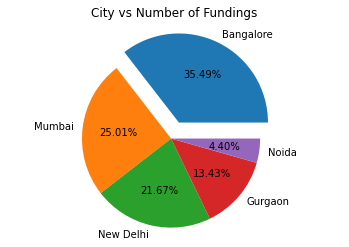

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


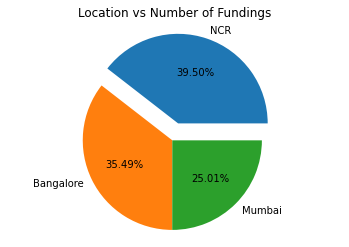

NCR 709
Bangalore 637
Mumbai 449


In [115]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
file=file_data["CityLocation"]

## correction of spellings of citie.
file.replace("Delhi","New Delhi",inplace=True)
file.replace("bangalore","Bangalore",inplace=True)
##Using dropna drop the rows with “NaN” values
##present and keeping the index same.
file.dropna(inplace=True)

##Create two dictionaries 1. city_dict for city 
#wise number on fundings  and  
##2. Location_dict for location wise number of fundings.(as NCR is considered One Location).

city_dict={}
location_dict={}
def separateCity(city):
    city=city.split("/")
    location_li=[]
    city_li=[]
    for data in city:
        city_name=data.strip()
        if city_name=="Mumbai" or city_name=="Bangalore":
            location_li.append(city_name)
            city_li.append(city_name)
        elif city_name=="New Delhi" or city_name=="Gurgaon" or city_name=="Noida":
            location_li.append("NCR")
            city_li.append(city_name)
        
    for city_name in location_li:
        if city_name in location_dict:
            location_dict[city_name]+=1
        else:
            location_dict[city_name]=1
    for city_name in city_li:
        if city_name in city_dict:
            city_dict[city_name]+=1
        else:
            city_dict[city_name]=1
    
        
file=file.apply(separateCity)

# solution for city_dictionary
city_count=Counter(city_dict)

highest_city=city_count.most_common()

city=[]
funding_city=[]
for data in highest_city:
    
    city.append(data[0])
    funding_city.append(data[1])
    
explode_li=[0.2,0.0,0.0,0.0,0.0]
plt.title("City vs Number of Fundings")
plt.pie(funding_city,labels=city,explode=explode_li,autopct="%.2f%%")
plt.axis("equal")

plt.show()

for i in range(len(city)):
    print(city[i],funding_city[i])
    
## solution for location Dictionary
location_count=Counter(location_dict)

highest_location=location_count.most_common()
location=[]
funding_location=[]
for data in highest_location:
    location.append(data[0])
    funding_location.append(data[1])
    
explode_li=[0.2,0.0,0.0]
plt.title("Location vs Number of Fundings")
plt.pie(funding_location,labels=location,explode=explode_li,autopct="%.2f%%")
plt.axis("equal")

plt.show()

for i in range(len(location)):
    print(location[i],funding_location[i])

***Question 2: 
Even after trying for so many times, your friend’s startup could not find the investment. 
So you decided to take this matter in your hand and try to find the list of investors who probably 
can invest in your friend’s startup. Your list will increase the chance of your friend startup getting 
some initial investment by contacting these investors. Find the top 5 investors who have invested 
maximum number of times (consider repeat investments in one company also). In a startup, multiple 
investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.***

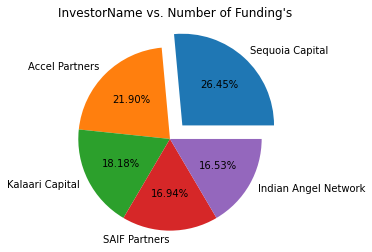

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [158]:


import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
df=file_data["InvestorsName"]
df.dropna(inplace=True)

df.replace("Undisclosed investors","Undisclosed Investors",inplace=True)
investor_dict={}
def seperateInvestor(name):
    name=name.split(",")
    name_li=[]
    
    for data in name:
        data=data.strip()
        if data!="" and data!="Undisclosed Investors":
            name_li.append(data)
        
    for data in name_li:
        
        if data in investor_dict:
            investor_dict[data]+=1
        else:
            investor_dict[data]=1
            
df=df.apply(seperateInvestor)
investor_count=Counter(investor_dict)
highest=investor_count.most_common(5)
name=[]
number_of_investments=[]
for data in highest:
    name.append(data[0])
    number_of_investments.append(data[1])
explode_li=[0.2,0.0,0.0,0.0,0.0]
plt.pie(number_of_investments,labels=name,explode=explode_li,autopct="%.2f%%")
plt.axis("equal")
plt.title("InvestorName vs. Number of Funding's")
plt.show()

for i in range(len(name)):
    print(name[i],number_of_investments[i])

    




***Question 3:
After re-analysing the dataset you found out that some investors have invested in the 
same startup at different number of funding rounds. So before finalising the previous 
list, you want to improvise it by finding the top 5 investors who have invested in 
different number of startups. This list will be more helpful than your previous list 
in finding the investment for your friend startup. Find the top 5 investors who have 
invested maximum number of times in different companies. That means, if one investor 
has invested multiple times in one startup, count one for that company. 
There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.***



<ipython-input-159-772c00f1baad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\AJAY\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


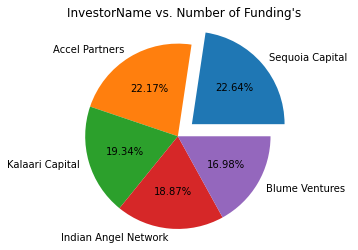

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [159]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
df=file_data[["StartupName","InvestorsName"]]
df.dropna(inplace=True)


df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)

df["InvestorsName"].replace("Undisclosed investors","Undisclosed Investors",inplace=True)

funding_count=df["StartupName"].value_counts(ascending=False)
startup=funding_count.index

investor_dict={}
for data in startup:
    idx=df[df["StartupName"]==data].index
    investor=df["InvestorsName"].loc[idx]
    name=investor.values
    name_li=[]
    
    
    for data in name:
        data=data.split(",")
        for i in data:
            if i!="" and i!="Undisclosed Investors":
                name_li.append(i.strip()) 
                
    np_name=np.array(name_li)
    main=np.unique(np_name)
    
    for data in main:
        if data in investor_dict:
            investor_dict[data]+=1
        else:
            investor_dict[data]=1
            
investors=Counter(investor_dict)
highest=investors.most_common(5)
name=[]
number_of_investments=[]
for data in highest:
    name.append(data[0])
    number_of_investments.append(data[1])
    

explode_li=[0.2,0.0,0.0,0.0,0.0]
plt.pie(number_of_investments,labels=name,explode=explode_li,autopct="%.2f%%")
plt.axis("equal")
plt.title("InvestorName vs. Number of Funding's")
plt.show()

for i in range(len(name)):
    
    print(name[i],number_of_investments[i])
       


        
    
    



***Question 4:
Even after putting so much effort in finding the probable investors, 
it didn't turn out to be helpful for your friend. 
So you went to your investor friend to understand the situation better 
and your investor friend explained to you about the different 
Investment Types and their features. This new information will be helpful 
in finding the right investor. Since your friend startup is at an early 
stage startup, the best-suited investment type would be - 
Seed Funding and Crowdfunding. Find the top 5 investors who have invested
in a different number of startups and their investment type is Crowdfunding or Seed Funding. 
Correct spelling of investment types are - 
"Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
Keep an eye for any spelling mistake. You can find this by printing unique 
values from this column. There are many errors in startup names. 
Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.***

<ipython-input-152-5fc31ab805c0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\AJAY\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\AJAY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


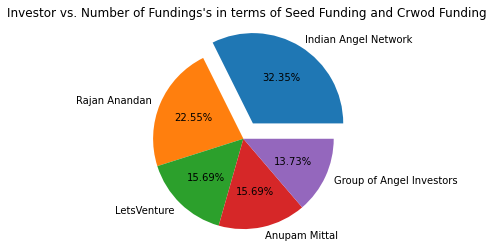

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


In [152]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
df=file_data[["StartupName","InvestorsName","InvestmentType"]]
df.dropna(inplace=True)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)

df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

df["InvestorsName"].replace("Undisclosed investors","Undisclosed Investors",inplace=True)

# dropping data index where INVESTMENTTYPE==Private Equity or Debt Funding
idx=df[(df["InvestmentType"]=="Private Equity") | (df["InvestmentType"]=="Debt Funding")].index
df.drop(idx,inplace=True)

funding_count=df["StartupName"].value_counts(ascending=False)
startup=funding_count.index

investor_dict={}
for data in startup:
    idx=df[df["StartupName"]==data].index
    investor=df["InvestorsName"].loc[idx]
    name=investor.values
    name_li=[]
    
    
    for data in name:
        data=data.split(",")
        for i in data:
            if i!="" and i!="Undisclosed Investors" :
                name_li.append(i.strip()) 
                
    np_name=np.array(name_li)
    main=np.unique(np_name)
    
    for data in main:
        if data in investor_dict:
            investor_dict[data]+=1
        else:
            investor_dict[data]=1
            
investors=Counter(investor_dict)
highest=investors.most_common(5)
name=[]
number_of_investments=[]
for data in highest:
    name.append(data[0])
    number_of_investments.append(data[1])


explode_li=[0.2,0.0,0.0,0.0,0.0]
plt.pie(number_of_investments,labels=name,explode=explode_li,autopct="%.2f%%")
plt.axis("equal")
plt.title("Investor vs. Number of Fundings's in terms of Seed Funding and Crwod Funding")

plt.show()
           
for i in range(5):
    print(name[i],number_of_investments[i])
    

    
    
    


***Question 5:
Due to your immense help, your friend startup successfully got seed funding and it 
is on the operational mode. Now your friend wants to expand his startup and he is 
looking for new investors for his startup. Now you again come as a saviour to help 
your friend and want to create a list of probable new new investors. Before moving 
forward you remember your investor friend advice that finding the investors by analysing 
the investment type. Since your friend startup is not in early phase it is in growth stage 
so the best-suited investment type is Private Equity. Find the top 5 investors who have 
invested in a different number of startups and their investment type is Private Equity. 
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", 
and "Crowd Funding". Keep an eye for any spelling mistake. 
You can find this by printing unique values from this column. 
There are many errors in startup names. Ignore correcting all, 
just handle the important ones - Ola, Flipkart, Oyo and Paytm.***

<ipython-input-153-559c302bad96>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\AJAY\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\AJAY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


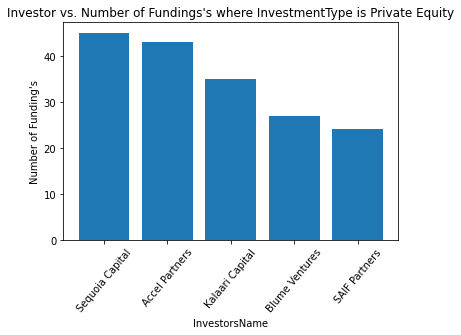

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


In [153]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
df=file_data[["StartupName","InvestorsName","InvestmentType"]]
df.dropna(inplace=True)

df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)

df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

df["InvestorsName"].replace("Undisclosed investors","Undisclosed Investors",inplace=True)

# dropping data index where INVESTMENTTYPE==Private Equity or Debt Funding
idx=df[(df["InvestmentType"]=="Seed Funding") | (df["InvestmentType"]=="Debt Funding") | (df["InvestmentType"]=="Crowd Funding")].index
df.drop(idx,inplace=True)

funding_count=df["StartupName"].value_counts(ascending=False)
startup=funding_count.index

investor_dict={}
for data in startup:
    idx=df[df["StartupName"]==data].index
    investor=df["InvestorsName"].loc[idx]
    name=investor.values
    name_li=[]
    
    
    for data in name:
        data=data.split(",")
        for i in data:
            if i!="" and i!="Undisclosed Investors" :
                name_li.append(i.strip()) 
                
    np_name=np.array(name_li)
    main=np.unique(np_name)
    
    for data in main:
        if data in investor_dict:
            investor_dict[data]+=1
        else:
            investor_dict[data]=1
            
investors=Counter(investor_dict)
highest=investors.most_common(5)
names=[]
number_of_investments=[]
for data in highest:
    names.append(data[0])
    number_of_investments.append(data[1])

plt.bar(names,number_of_investments)
plt.xlabel("InvestorsName")
plt.ylabel("Number of Funding's")
plt.title("Investor vs. Number of Fundings's where InvestmentType is Private Equity")
plt.xticks(rotation=50)
plt.show()

for i in range(5):
    print(names[i],number_of_investments[i])
           

Seed Funding 1301
Private Equity 1067
Crowd Funding 2
Debt Funding 1


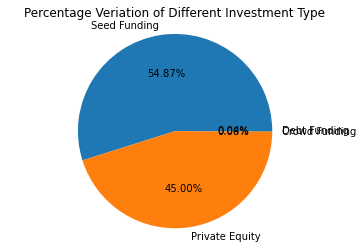

In [157]:
## pie chart for type of invesments.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

file_data=pd.read_csv(r"C:\Users\AJAY\Downloads\New folder\Data Science\startup_funding.csv",encoding="utf-8")
df=file_data["InvestmentType"]
df.dropna(inplace=True)


df.replace("SeedFunding","Seed Funding",inplace=True)
df.replace("PrivateEquity","Private Equity",inplace=True)
df.replace("Crowd funding","Crowd Funding",inplace=True)

data=df.value_counts(ascending=False)
InvestmentType=data.index
quantity=data.values

for i in range(len(InvestmentType)):
    print(InvestmentType[i],quantity[i])

plt.pie(quantity,labels=InvestmentType,autopct="%.2f%%")
plt.axis("equal")

plt.title("Percentage Veriation of Different Investment Type")
plt.show()
